# Package Install, Bỏ qua nếu đã đủ package

In [ ]:
!pip install catboost
!pip install tensorflow


CELL dùng để cài đặt package, bỏ qua nếu đã có những package này rồi

# Import thư viện và dữ liệu


CELL dưới đây dùng để import những thư viện cần thiết

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, Dense
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import SimpleRNN
# from tensorflow.keras.layers import Dropout

In [ ]:
# Read in white wine data
wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine.describe().head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Visualization data


In [ ]:
# #Making binary classificaion for the response variable.
from sklearn.preprocessing import LabelEncoder
bins = (0, 6, 10)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
count_quality = wine['quality'].value_counts()
print(count_quality)

0    3838
1    1060
Name: quality, dtype: int64


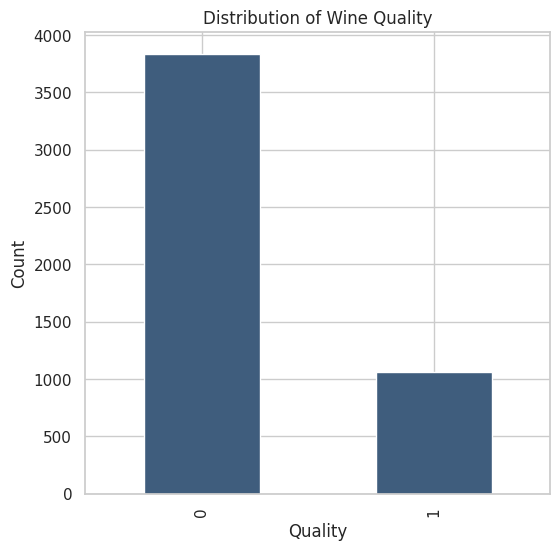

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(6, 6))
wine['quality'].value_counts().sort_index().plot(kind='bar', color='#3F5D7D')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

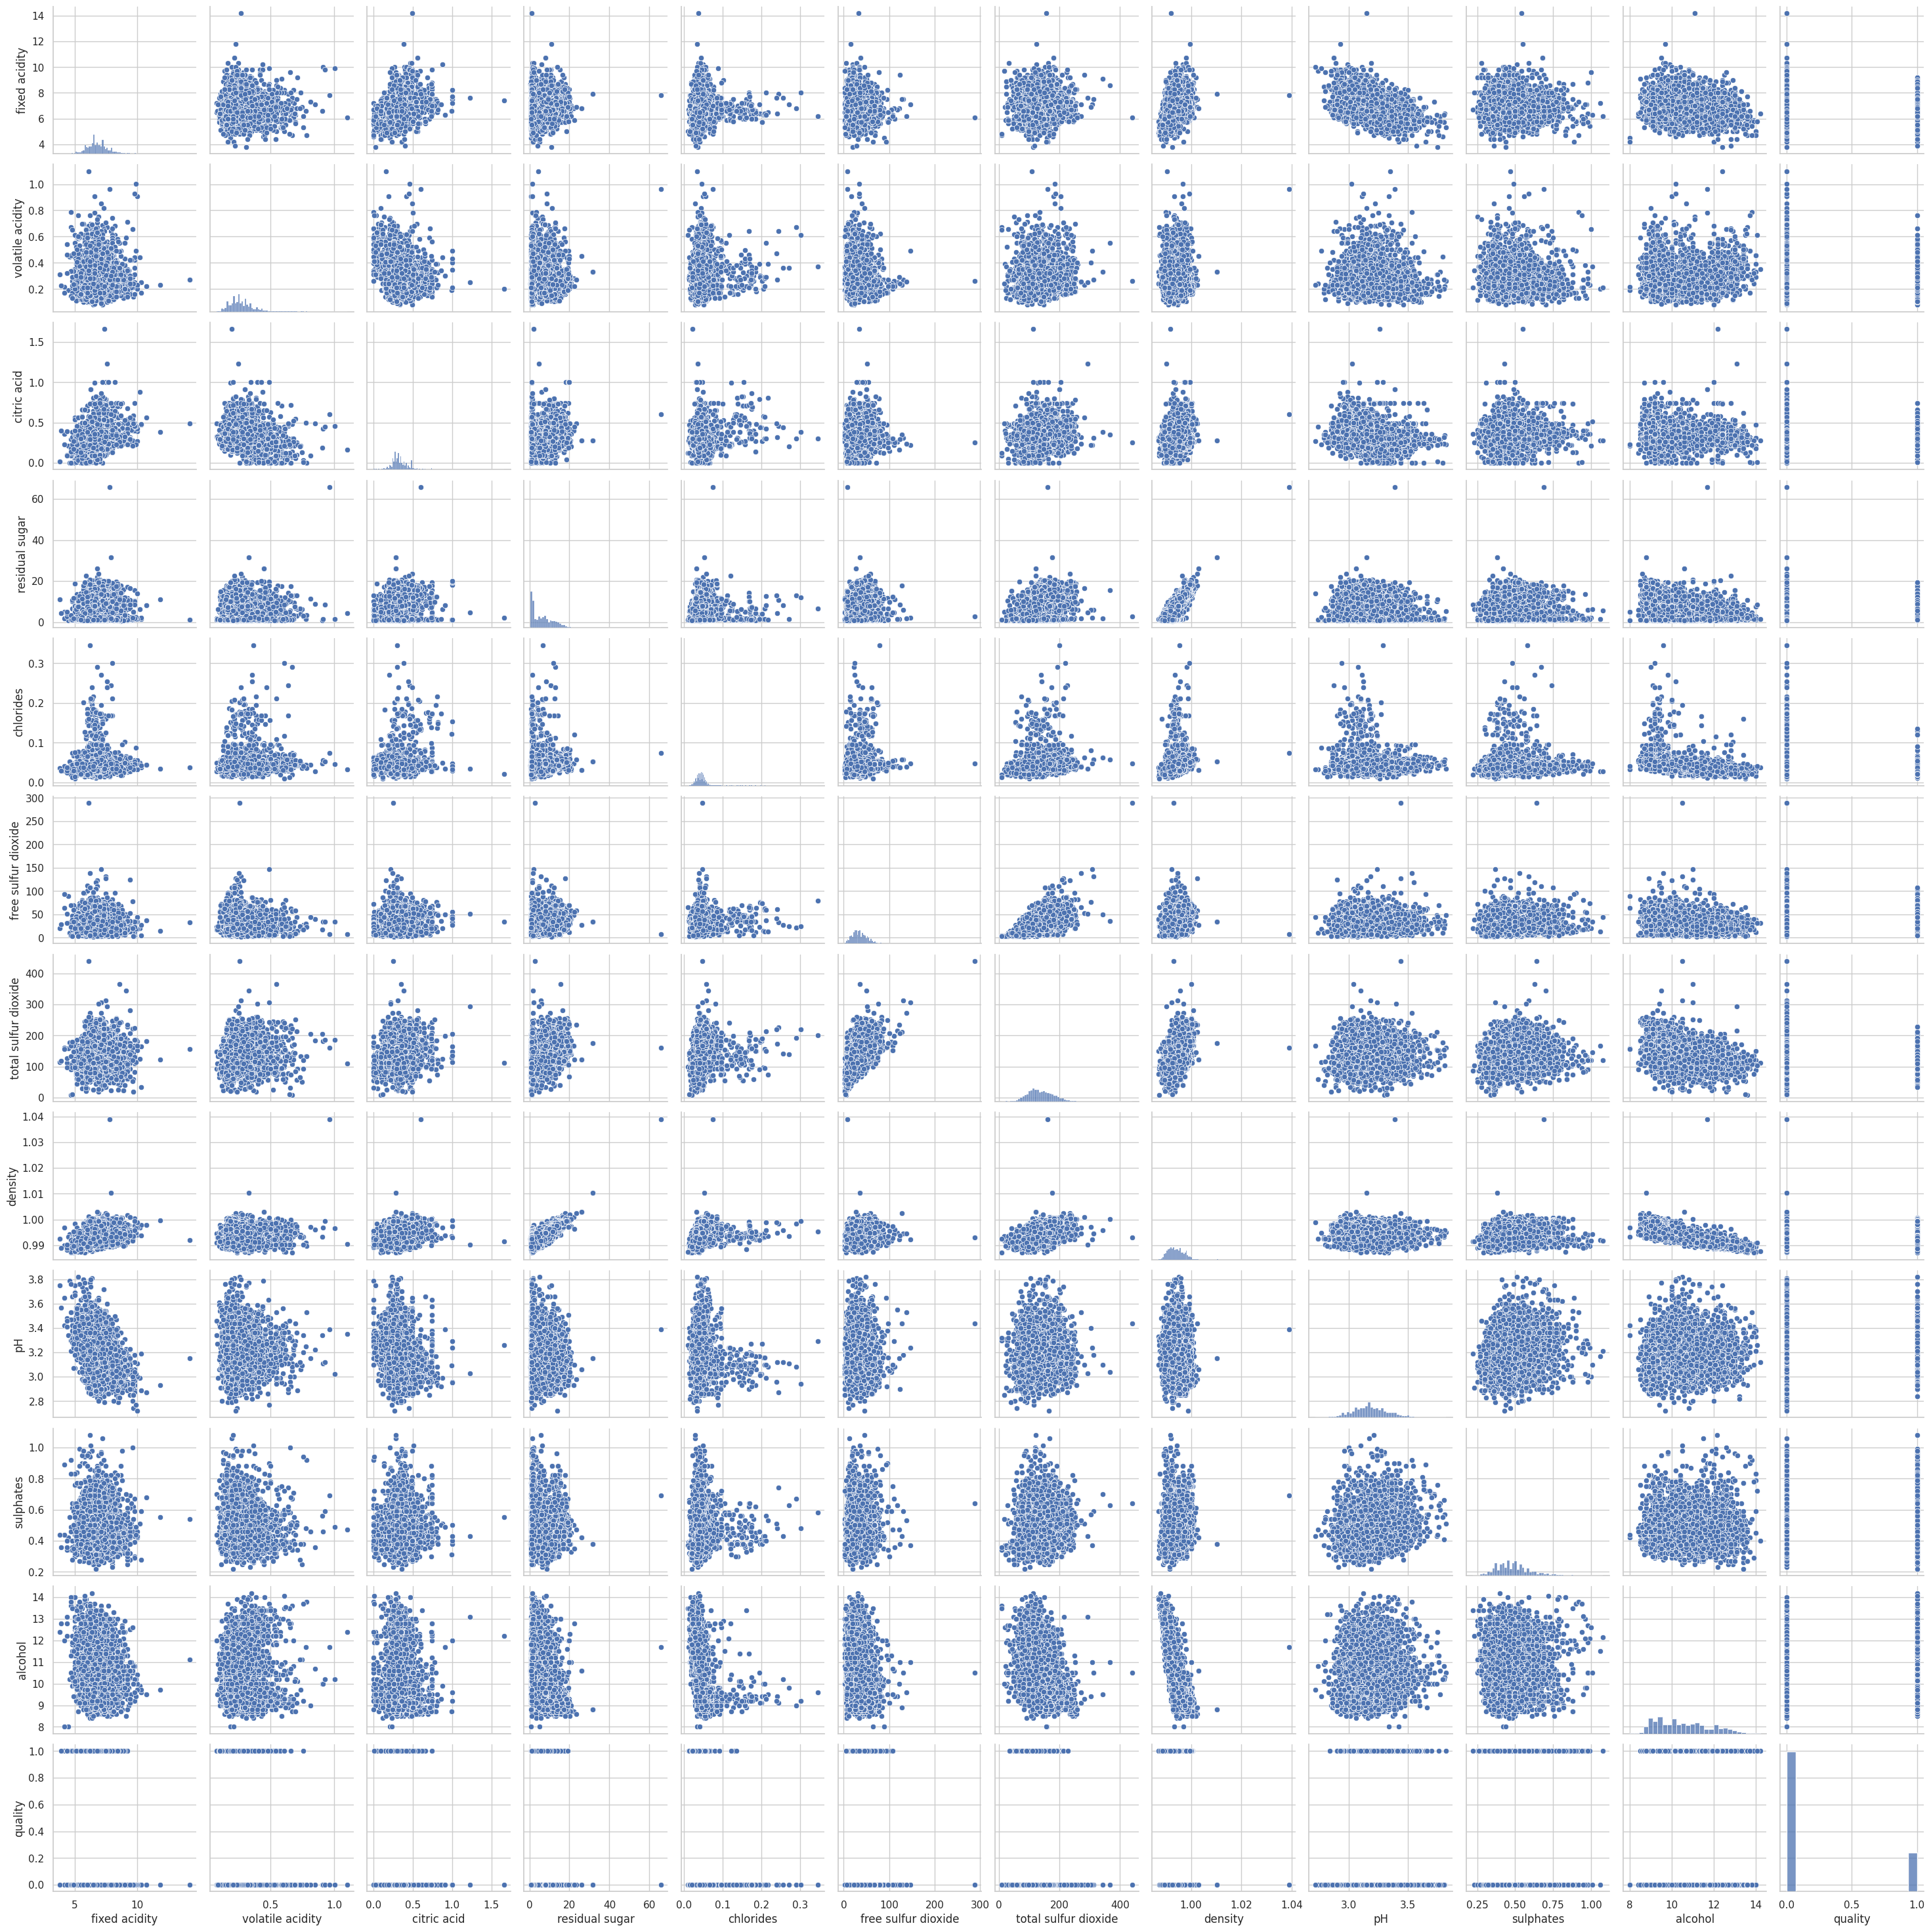

In [ ]:
# tạo ra ma trận scatter plot cho các dataframe
sns.pairplot(wine)

In [ ]:
wine.iloc[:,:-1].describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.0

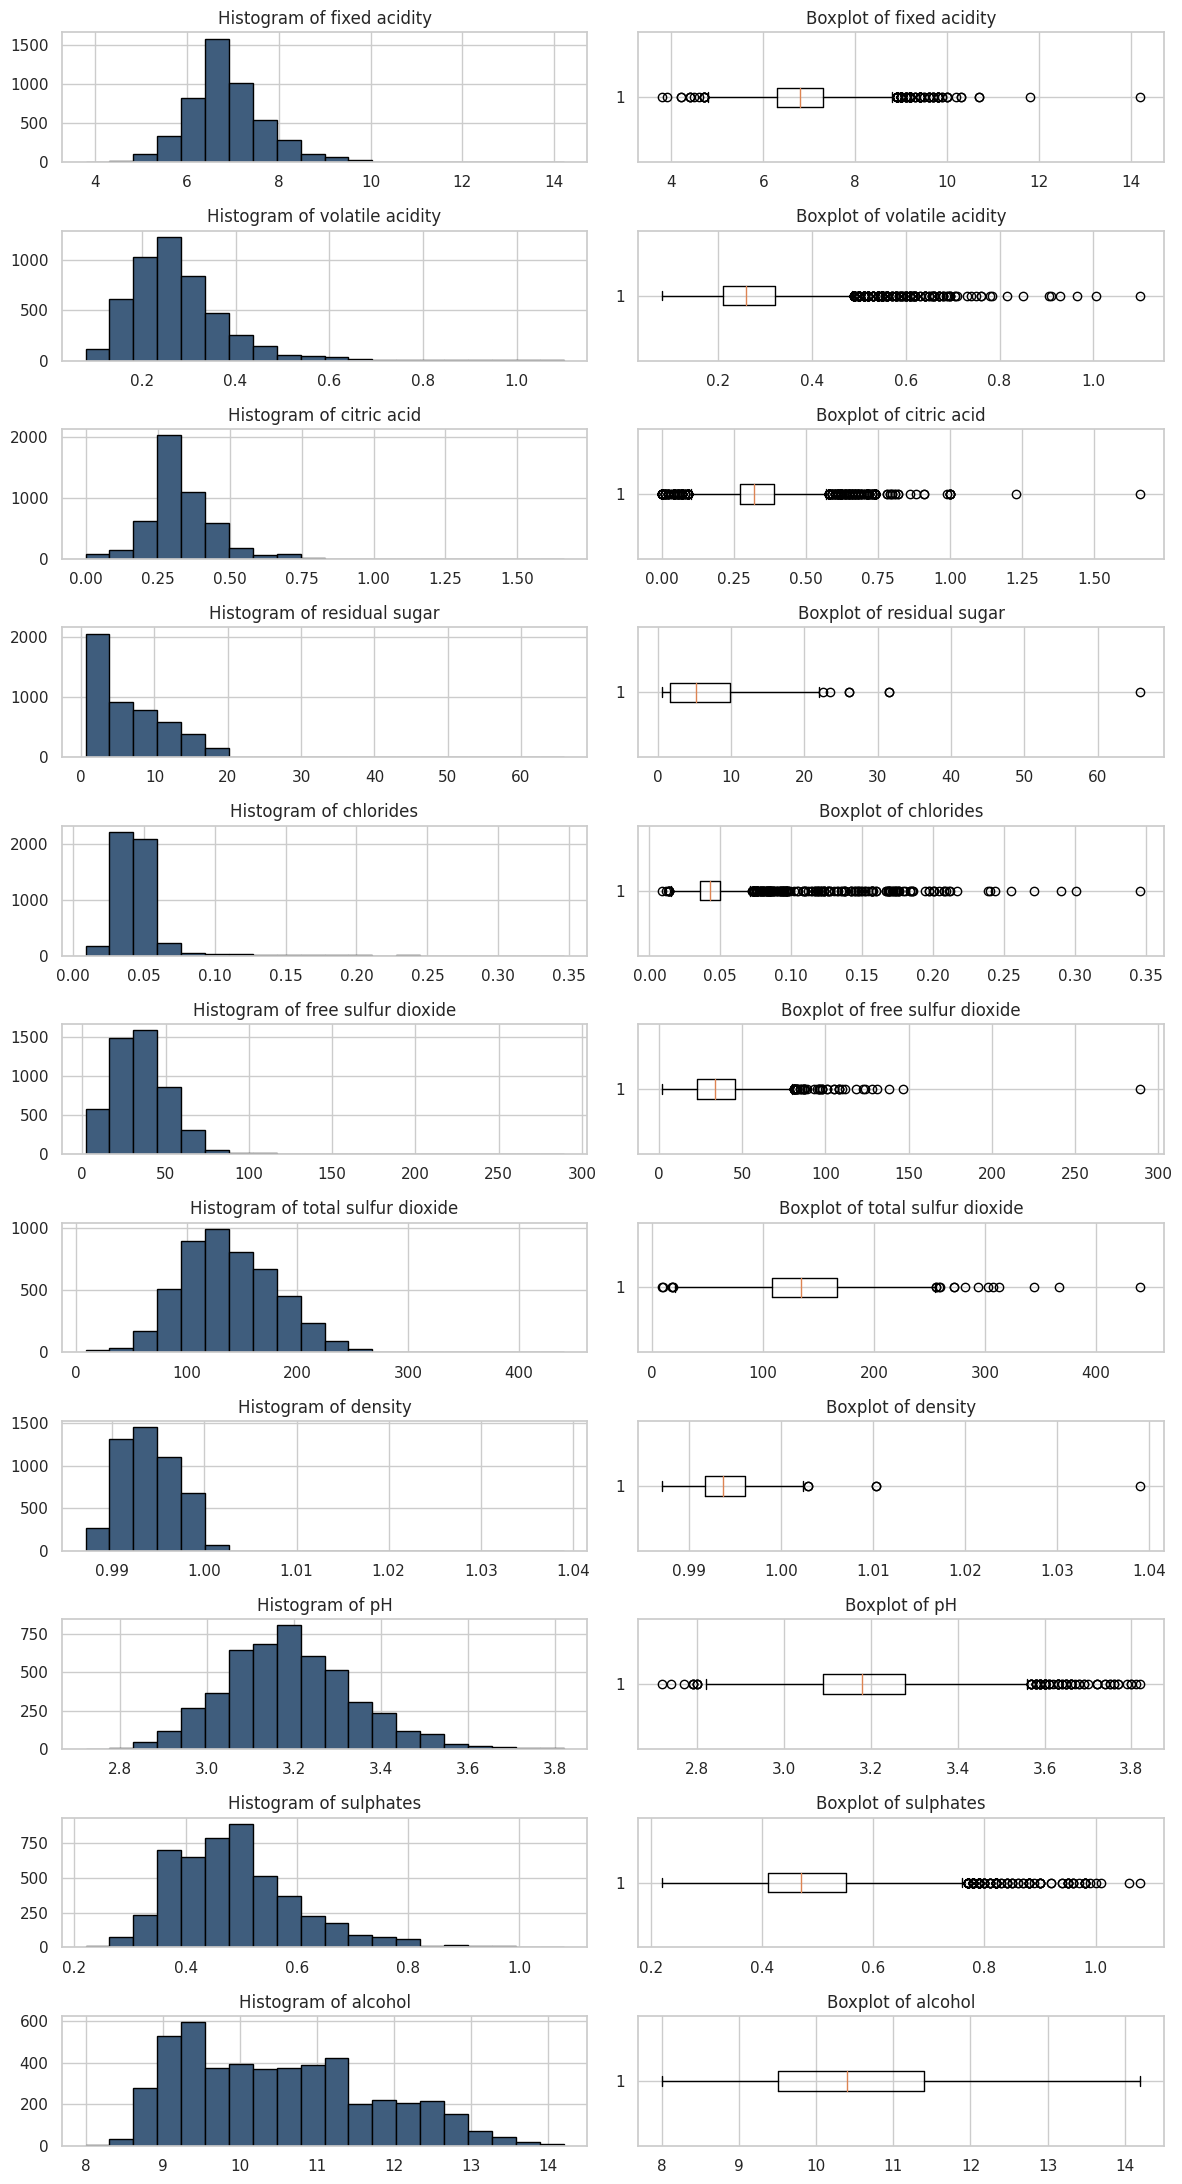

In [ ]:

# Chọn các biến số (các cột) từ DataFrame 'wine'
selected_variables = wine.iloc[:, :-1]

# Mô tả thống kê của các biến số và vẽ histogram
fig, axes = plt.subplots(nrows=selected_variables.shape[1], ncols=2, figsize=(12, 2 * selected_variables.shape[1]))

# Lặp qua từng cột và vẽ histogram
for i, column in enumerate(selected_variables.columns):
    # Histogram
    axes[i, 0].hist(selected_variables[column], bins=20, color='#3F5D7D', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {column}')

    # Boxplot
    axes[i, 1].boxplot(selected_variables[column], vert=False)
    axes[i, 1].set_title(f'Boxplot of {column}')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

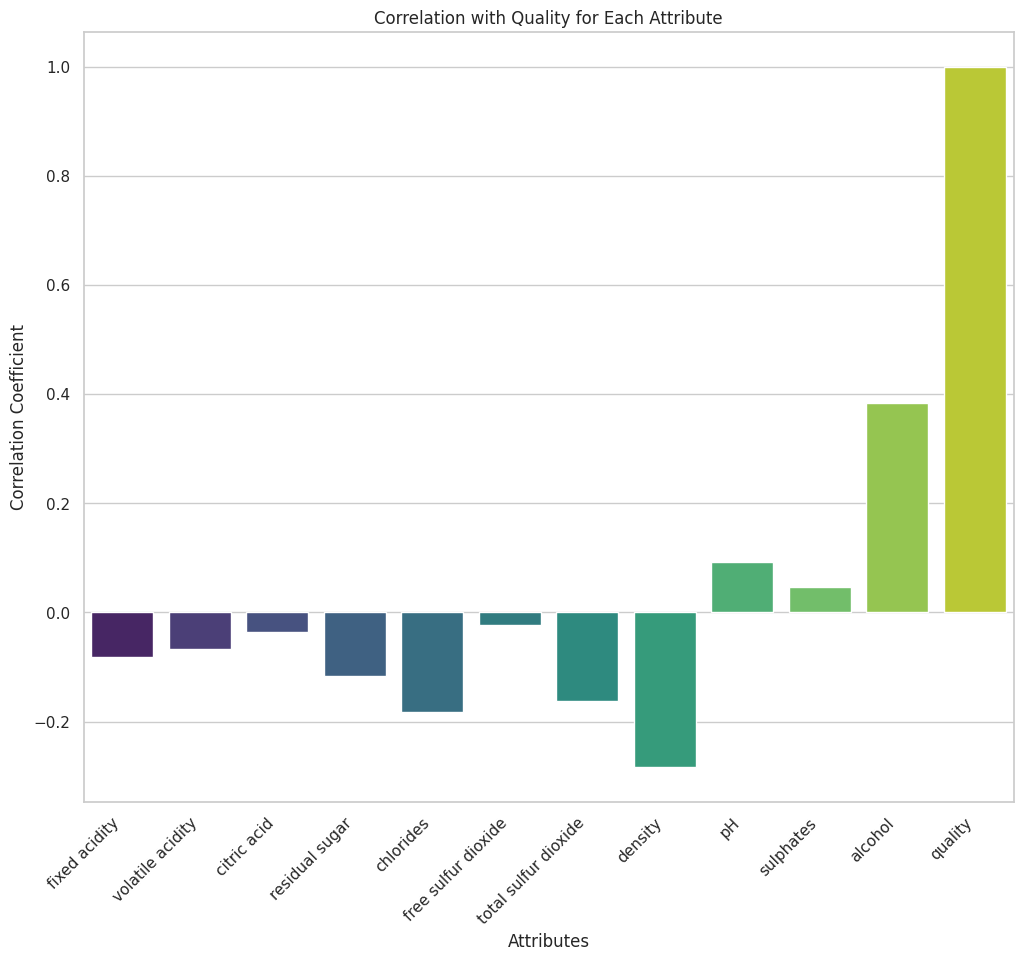

In [ ]:
# Tương quan giữa Quality với các thuộc tính

# Set the style of seaborn
sns.set(style="whitegrid")

# Vẽ đồ thị thể hiện tương quan
plt.figure(figsize=(12, 10))
correlation_matrix = wine.corr()
sns.barplot(x=correlation_matrix['quality'].index, y=correlation_matrix['quality'].values, palette="viridis")
plt.title('Correlation with Quality for Each Attribute')
plt.xlabel('Attributes')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Ma trận tương quan
corr = wine.corr()
corr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.080748
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.067225
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.035330
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.117085
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183118


# Feature Engineering


In [ ]:
# Lấy tên cột
feature_columns = wine.columns[:-1]

In [ ]:
X = wine.iloc[:,:-1].values
X
y = wine.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Xác định những feature quan trọng bằng Random Forrest

# Xây dựng mô hình Random Forest
model = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
model.fit(X, y)

# Đo lường độ quan trọng của các feature
feature_importance = model.feature_importances_
feature_importance

for i in range(len(feature_columns)):
    print(f"{feature_columns[i]}: {feature_importance[i]}")

fixed acidity: 0.06816579298286883
volatile acidity: 0.09057583783256026
citric acid: 0.07668452207498645
residual sugar: 0.08731988684304294
chlorides: 0.0840559443071913
free sulfur dioxide: 0.08565646901103245
total sulfur dioxide: 0.08187923574095696
density: 0.12206957240736983
pH: 0.08262442906696124
sulphates: 0.07365410486060095
alcohol: 0.14731420487242883


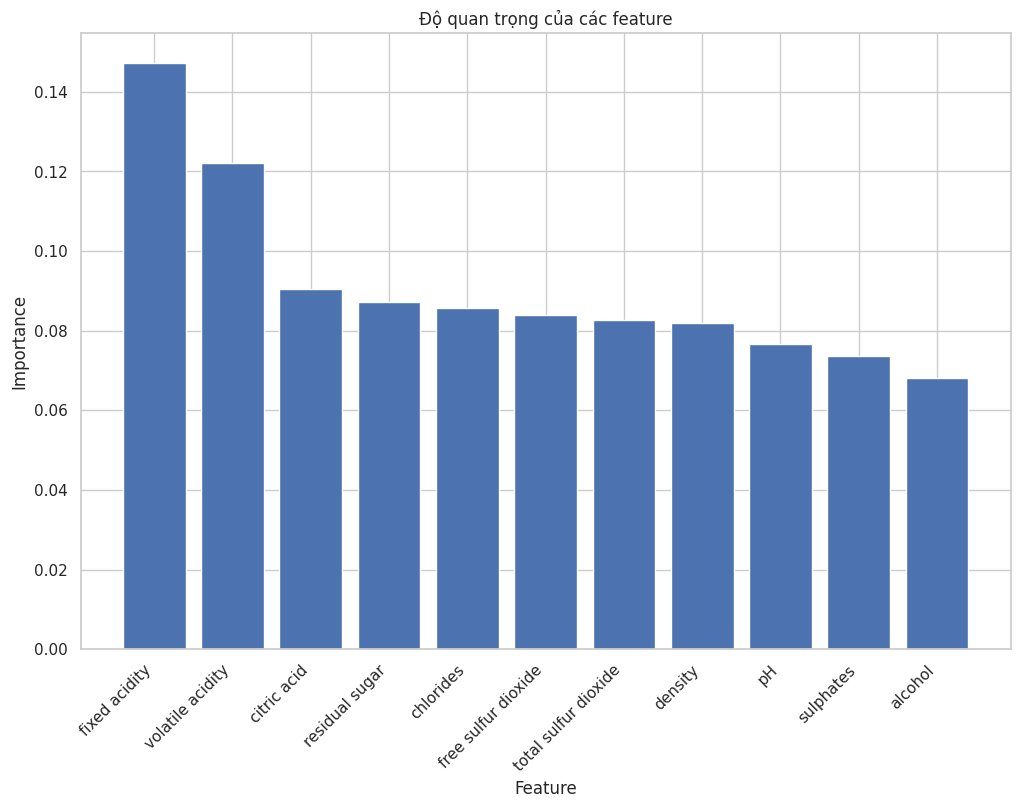

In [ ]:

# Sắp xếp indices theo độ quan trọng giảm dần
indices = np.argsort(feature_importance)[::-1]

# Vẽ histogram thể hiện độ quan trọng của các feature
plt.figure(figsize=(12, 8))
plt.bar(feature_columns, feature_importance[indices])
plt.title('Độ quan trọng của các feature')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.show()

In [ ]:
X = wine.iloc[:,:-1].values
X
y = wine.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#Scale data
minmax_scaler =  MinMaxScaler()

df_scale = wine[feature_columns]
df_scale

scaled_data = minmax_scaler.fit_transform(df_scale)
scaled_data

wine[feature_columns] = pd.DataFrame(scaled_data, columns = feature_columns)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0


In [ ]:
# Thực hiện chia dữ liệu ra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Giảm chiều dữ liệu
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_test_pca

array([[ 0.02937564,  0.00700966,  0.14094743,  0.04534236],
       [ 0.45138792,  0.01940153,  0.04051068,  0.26918751],
       [ 0.29305927, -0.01171869, -0.04916809, -0.0157239 ],
       ...,
       [-0.16009777,  0.07129906, -0.14892343,  0.00340642],
       [-0.21778475, -0.03886022,  0.08127373, -0.00616536],
       [-0.02119863,  0.22348841, -0.16509499, -0.07187763]])

# Ensemble Learning

In [ ]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(X_train_pca,y_train)

y_logistic = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_logistic)
precision = precision_score(y_test, y_logistic)
recall = recall_score(y_test, y_logistic)
f1 = f1_score(y_test, y_logistic)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,y_logistic))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_logistic))

Accuracy: 0.7816326530612245
Precision: 0.6031746031746031
Recall: 0.16740088105726872
F1 Score: 0.2620689655172414

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       753
           1       0.60      0.17      0.26       227

    accuracy                           0.78       980
   macro avg       0.70      0.57      0.57       980
weighted avg       0.75      0.78      0.73       980


Confusion Matrix:
[[728  25]
 [189  38]]


In [ ]:
# Decision Tree
DTC = tree.DecisionTreeClassifier()

DTC.fit(X_train_pca, y_train)

y_pred_Tree = DTC.predict(X_test_pca)

accuracy = accuracy_score(y_test,y_pred_Tree)
precision = precision_score(y_test,y_pred_Tree)
recall = recall_score(y_test, y_pred_Tree)
f1 = f1_score(y_test, y_pred_Tree)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,y_pred_Tree))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_Tree))


Accuracy: 0.8326530612244898
Precision: 0.6363636363636364
Recall: 0.6475770925110133
F1 Score: 0.6419213973799126

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       753
           1       0.64      0.65      0.64       227

    accuracy                           0.83       980
   macro avg       0.76      0.77      0.77       980
weighted avg       0.83      0.83      0.83       980


Confusion Matrix:
[[669  84]
 [ 80 147]]


In [ ]:
# kNN

knn = KNeighborsClassifier(n_neighbors = 70, weights = 'distance')
knn.fit(X_train_pca, y_train)

y_pred_kNN = knn.predict(X_test_pca)

accuracy = accuracy_score(y_test,y_pred_kNN)
precision = precision_score(y_test,y_pred_kNN)
recall = recall_score(y_test,y_pred_kNN)
f1 = f1_score(y_test,y_pred_kNN)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,y_pred_kNN))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_kNN))

Accuracy: 0.8714285714285714
Precision: 0.821656050955414
Recall: 0.5682819383259912
F1 Score: 0.671875

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       753
           1       0.82      0.57      0.67       227

    accuracy                           0.87       980
   macro avg       0.85      0.77      0.80       980
weighted avg       0.87      0.87      0.86       980


Confusion Matrix:
[[725  28]
 [ 98 129]]


In [ ]:
# Naive Bayes

model = GaussianNB()
model.fit(X_train_pca, y_train)

y_pred_NB = model.predict(X_test_pca)

accuracy = accuracy_score(y_test,y_pred_NB)
precision = precision_score(y_test,y_pred_NB)
recall = recall_score(y_test,y_pred_NB)
f1 = f1_score(y_test,y_pred_NB)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,y_pred_NB))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_NB))

Accuracy: 0.7755102040816326
Precision: 0.5339805825242718
Recall: 0.2422907488986784
F1 Score: 0.33333333333333337

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       753
           1       0.53      0.24      0.33       227

    accuracy                           0.78       980
   macro avg       0.67      0.59      0.60       980
weighted avg       0.74      0.78      0.74       980


Confusion Matrix:
[[705  48]
 [172  55]]


In [ ]:
#XGBoost_EnsembleLearning

xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_classifier.fit(X_train_pca, y_train)
xgb_predictions = xgb_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test,xgb_predictions)
precision = precision_score(y_test,xgb_predictions)
recall = recall_score(y_test,xgb_predictions)
f1 = f1_score(y_test,xgb_predictions)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,xgb_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,xgb_predictions))

Accuracy: 0.813265306122449
Precision: 0.7075471698113207
Recall: 0.3303964757709251
F1 Score: 0.4504504504504505

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       753
           1       0.71      0.33      0.45       227

    accuracy                           0.81       980
   macro avg       0.77      0.64      0.67       980
weighted avg       0.80      0.81      0.79       980


Confusion Matrix:
[[722  31]
 [152  75]]


In [ ]:
#LightBGM_EnsembleLearning
lgbm_classifier = LGBMClassifier(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=42)
lgbm_classifier.fit(X_train_pca, y_train)
lgbm_predictions = lgbm_classifier.predict(X_test_pca)


accuracy = accuracy_score(y_test,lgbm_predictions)
precision = precision_score(y_test,lgbm_predictions)
recall = recall_score(y_test,lgbm_predictions)
f1 = f1_score(y_test,lgbm_predictions)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,lgbm_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,lgbm_predictions))

[LightGBM] [Info] Number of positive: 833, number of negative: 3085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3918, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212608 -> initscore=-1.309273
[LightGBM] [Info] Start training from score -1.309273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.7959183673469388
Precision: 0.6956521739130435
Recall: 0.21145374449339208
F1 Score: 0.32432432432432434

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       753
           1       0.70      0.21      0.32       227

    accuracy                           0.80       980
   macro avg       0.75      0.59      0.60       980
weighted avg       0.78

In [ ]:
#Catboost_EnsembleLearning - Note: Chỉ chạy khi đã cài đặt thư viện catboost - chạy codeblock đầu tiên

cat_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_seed=42)
cat_classifier.fit(X_train_pca, y_train)
cat_predictions = cat_classifier.predict(X_test_pca)


accuracy = accuracy_score(y_test,cat_predictions)
precision = precision_score(y_test,cat_predictions)
recall = recall_score(y_test,cat_predictions)
f1 = f1_score(y_test,cat_predictions)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,cat_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,cat_predictions))


0:	learn: 0.6537188	total: 852us	remaining: 84.4ms
1:	learn: 0.6197394	total: 2.45ms	remaining: 120ms
2:	learn: 0.5907672	total: 3.55ms	remaining: 115ms
3:	learn: 0.5685678	total: 4.53ms	remaining: 109ms
4:	learn: 0.5491578	total: 5.48ms	remaining: 104ms
5:	learn: 0.5321324	total: 6.39ms	remaining: 100ms
6:	learn: 0.5191519	total: 7.39ms	remaining: 98.1ms
7:	learn: 0.5060075	total: 8.47ms	remaining: 97.4ms
8:	learn: 0.4955100	total: 9.49ms	remaining: 96ms
9:	learn: 0.4856061	total: 10.4ms	remaining: 94ms
10:	learn: 0.4773254	total: 11.4ms	remaining: 92.4ms
11:	learn: 0.4698556	total: 12.4ms	remaining: 90.7ms
12:	learn: 0.4649172	total: 13.3ms	remaining: 89ms
13:	learn: 0.4599209	total: 14.3ms	remaining: 88ms
14:	learn: 0.4545611	total: 15.3ms	remaining: 87ms
15:	learn: 0.4504312	total: 16.3ms	remaining: 85.6ms
16:	learn: 0.4467202	total: 17.3ms	remaining: 84.2ms
17:	learn: 0.4424724	total: 18.2ms	remaining: 83ms
18:	learn: 0.4397891	total: 19.1ms	remaining: 81.6ms
19:	learn: 0.4365960	

In [ ]:
# RandomForestEnsemble_Learning
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)
rf_predictions = rf_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test,rf_predictions)
precision = precision_score(y_test,rf_predictions)
recall = recall_score(y_test,rf_predictions)
f1 = f1_score(y_test,rf_predictions)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,rf_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,rf_predictions))

Accuracy: 0.8663265306122448
Precision: 0.7666666666666667
Recall: 0.6079295154185022
F1 Score: 0.6781326781326781

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       753
           1       0.77      0.61      0.68       227

    accuracy                           0.87       980
   macro avg       0.83      0.78      0.80       980
weighted avg       0.86      0.87      0.86       980


Confusion Matrix:
[[711  42]
 [ 89 138]]


In [ ]:
#AdaBoost_EnsembleLearning
adb_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adb_classifier.fit(X_train_pca, y_train)
adb_predictions = adb_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test,adb_predictions)
precision = precision_score(y_test,adb_predictions)
recall = recall_score(y_test,adb_predictions)
f1 = f1_score(y_test,adb_predictions)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,adb_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,adb_predictions))


Accuracy: 0.7806122448979592
Precision: 0.5545454545454546
Recall: 0.2687224669603524
F1 Score: 0.3620178041543027

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       753
           1       0.55      0.27      0.36       227

    accuracy                           0.78       980
   macro avg       0.68      0.60      0.61       980
weighted avg       0.75      0.78      0.75       980


Confusion Matrix:
[[704  49]
 [166  61]]


In [ ]:
#GradientBoosting_EnsembleLearning
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test,gb_predictions)
precision = precision_score(y_test,gb_predictions)
recall = recall_score(y_test,gb_predictions)
f1 = f1_score(y_test,gb_predictions)

#Evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test,gb_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,gb_predictions))

Accuracy: 0.8275510204081633
Precision: 0.704225352112676
Recall: 0.44052863436123346
F1 Score: 0.5420054200542005

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       753
           1       0.70      0.44      0.54       227

    accuracy                           0.83       980
   macro avg       0.78      0.69      0.72       980
weighted avg       0.82      0.83      0.81       980


Confusion Matrix:
[[711  42]
 [127 100]]


# Neural Network

In [ ]:
# FFNN

print(X_train_pca.shape)

# Xây dựng mô hình
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(4,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Biên soạn mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Hiển thị tóm tắt mô hình
model.summary()

model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)

# Đánh giá mô hình trên tập kiểm tra
evaluation_result = model.evaluate(X_test_pca, y_test)

# In kết quả
print("Loss on test set:", evaluation_result[0])
print("Accuracy on test set:", evaluation_result[1])


(3918, 4)
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                320       
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2433 (9.50 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
111/111 - 1s - loss: 0.5456 - accuracy: 0.7728 - val_loss: 0.4204 - val_accuracy: 0.8036 - 1s/epoch - 12ms/step
Epoch 2/10
111/111 - 0s - loss: 0.4464 - accuracy: 0.7995 - val_loss: 0.4023 - val_accuracy: 0.8214 - 267ms/epoch - 2ms/step
Epoch 3/10
111/111 - 0s - l

In [ ]:
from keras.layers import Reshape

# Khởi tạo mô hình RNN
classifier = Sequential()

# Thêm lớp Reshape để biến đổi kích thước đầu vào
classifier.add(Reshape((X_train_pca.shape[1], 1), input_shape=(X_train_pca.shape[1],)))

# Thêm lớp SimpleRNN với đầu vào là số lượng units là 50 và return_sequences=True vì chúng ta có nhiều tầng ẩn
classifier.add(SimpleRNN(units=50, return_sequences=True))

# Thêm lớp SimpleRNN khác với return_sequences=False vì chúng ta chỉ cần output ở tầng cuối cùng
classifier.add(SimpleRNN(units=50, return_sequences=False))

# Thêm lớp output Dense với 1 unit và activation='sigmoid' vì đây là bài toán phân loại nhị phân
classifier.add(Dense(units=1, activation='sigmoid'))

# Biên dịch mô hình với optimizer là 'adam' và hàm loss là 'binary_crossentropy'
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình trên tập huấn luyện
classifier.fit(X_train_pca, y_train, epochs=5, batch_size=32)

# Đánh giá mô hình trên tập kiểm tra
evaluation_result = classifier.evaluate(X_test_pca, y_test)

# In kết quả
print("Loss on test set:", evaluation_result[0])
print("Accuracy on test set:", evaluation_result[1])


Epoch 1/5
123/123 [==============================] - 8s 11ms/step - loss: 0.4643 - accuracy: 0.7833
Epoch 2/5
123/123 [==============================] - 1s 12ms/step - loss: 0.4419 - accuracy: 0.8014
Epoch 3/5
123/123 [==============================] - 2s 13ms/step - loss: 0.4395 - accuracy: 0.7956
Epoch 4/5
123/123 [==============================] - 1s 5ms/step - loss: 0.4369 - accuracy: 0.7994
Epoch 5/5
31/31 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.7765
Loss on test set: 0.4632776379585266
Accuracy on test set: 0.7765306234359741


# Các phương pháp tránh overfitting

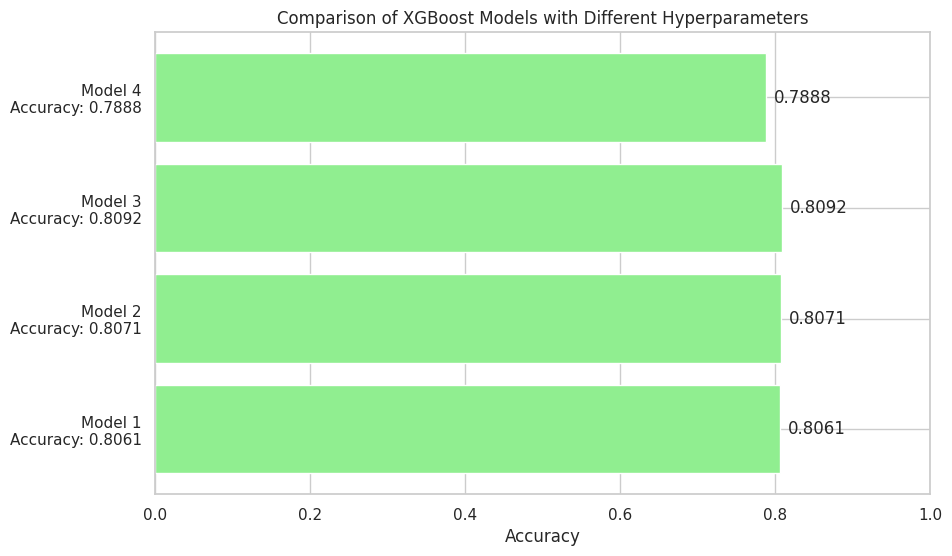

In [ ]:
#XGB
param_variations_xgb = [
    {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 2},
    {'n_estimators': 50, 'learning_rate': 0.05, 'max_depth': 2},
]

# Cho model học tập với các param_variations khác nhau
results_xgb = []

for params_xgb in param_variations_xgb:
    xgb_classifier = XGBClassifier(random_state=42, **params_xgb)
    xgb_classifier.fit(X_train_pca, y_train)
    xgb_predictions = xgb_classifier.predict(X_test_pca)

    accuracy_xgb = accuracy_score(y_test, xgb_predictions)
    results_xgb.append(accuracy_xgb)

# Plot so sánh XGBoost
labels_xgb = [f"Model {i+1}\nAccuracy: {results_xgb[i]:.4f}" for i in range(len(param_variations_xgb))]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels_xgb, results_xgb, color='lightgreen')

for bar, result_xgb in zip(bars, results_xgb):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{result_xgb:.4f}', ha='left', va='center')

plt.xlabel('Accuracy')
plt.title('Comparison of XGBoost Models with Different Hyperparameters')
plt.xlim(0, 1)
plt.show()

[LightGBM] [Info] Number of positive: 833, number of negative: 3085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3918, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212608 -> initscore=-1.309273
[LightGBM] [Info] Start training from score -1.309273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

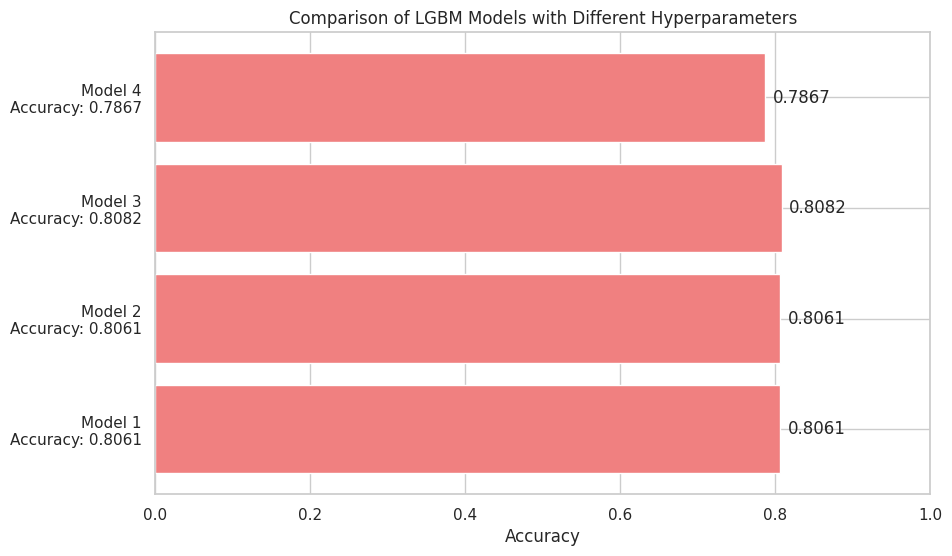

In [ ]:
#LGBM
param_variations_lgbm = [
    {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 2},
    {'n_estimators': 50, 'learning_rate': 0.05, 'max_depth': 2},
]

results_lgbm = []

for params_lgbm in param_variations_lgbm:
    lgbm_classifier = LGBMClassifier(random_state=42, **params_lgbm)
    lgbm_classifier.fit(X_train_pca, y_train)
    lgbm_predictions = lgbm_classifier.predict(X_test_pca)

    accuracy_lgbm = accuracy_score(y_test, lgbm_predictions)
    results_lgbm.append(accuracy_lgbm)

# Plot so sánh LGBM
labels_lgbm = [f"Model {i+1}\nAccuracy: {results_lgbm[i]:.4f}" for i in range(len(param_variations_lgbm))]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels_lgbm, results_lgbm, color='lightcoral')

for bar, result_lgbm in zip(bars, results_lgbm):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{result_lgbm:.4f}', ha='left', va='center')

plt.xlabel('Accuracy')
plt.title('Comparison of LGBM Models with Different Hyperparameters')
plt.xlim(0, 1)
plt.show()

0:	learn: 0.6537188	total: 2.81ms	remaining: 138ms
1:	learn: 0.6197394	total: 6.06ms	remaining: 145ms
2:	learn: 0.5907672	total: 8.16ms	remaining: 128ms
3:	learn: 0.5685678	total: 10.1ms	remaining: 117ms
4:	learn: 0.5491578	total: 12.2ms	remaining: 110ms
5:	learn: 0.5321324	total: 14.2ms	remaining: 104ms
6:	learn: 0.5191519	total: 16.2ms	remaining: 99.3ms
7:	learn: 0.5060075	total: 18.2ms	remaining: 95.5ms
8:	learn: 0.4955100	total: 20.3ms	remaining: 92.5ms
9:	learn: 0.4856061	total: 24.9ms	remaining: 99.5ms
10:	learn: 0.4773254	total: 26.4ms	remaining: 93.5ms
11:	learn: 0.4698556	total: 29.1ms	remaining: 92.2ms
12:	learn: 0.4649172	total: 31.4ms	remaining: 89.3ms
13:	learn: 0.4599209	total: 33.7ms	remaining: 86.6ms
14:	learn: 0.4545611	total: 36.2ms	remaining: 84.6ms
15:	learn: 0.4504312	total: 38.6ms	remaining: 82.1ms
16:	learn: 0.4467202	total: 39.9ms	remaining: 77.5ms
17:	learn: 0.4424724	total: 42.6ms	remaining: 75.8ms
18:	learn: 0.4397891	total: 44.8ms	remaining: 73.1ms
19:	learn

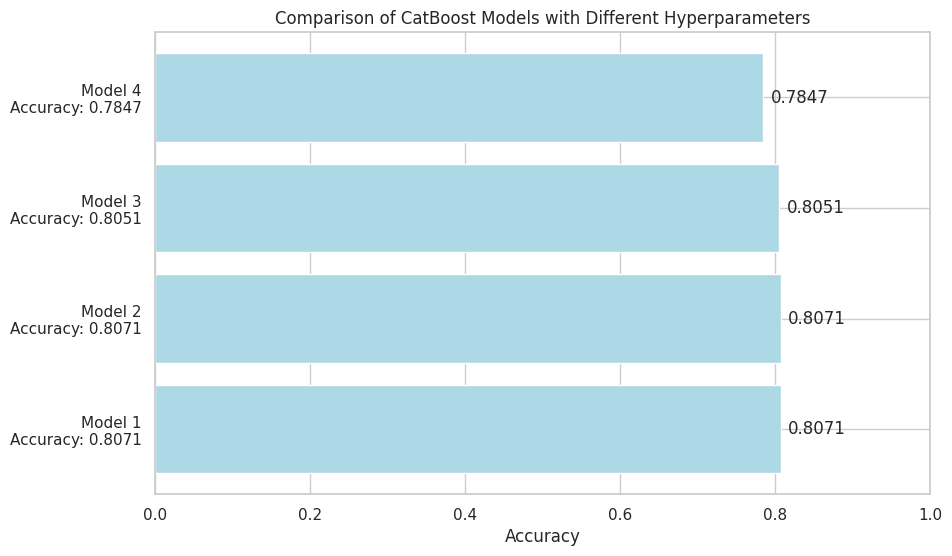

In [ ]:
#CatBoost
param_variations_cat = [
    {'iterations': 50, 'learning_rate': 0.1, 'depth': 3},
    {'iterations': 100, 'learning_rate': 0.05, 'depth': 3},
    {'iterations': 100, 'learning_rate': 0.1, 'depth': 2},
    {'iterations': 50, 'learning_rate': 0.05, 'depth': 2},
]

results_cat = []

for params_cat in param_variations_cat:
    cat_classifier = CatBoostClassifier(random_state=42, **params_cat)
    cat_classifier.fit(X_train_pca, y_train)
    cat_predictions = cat_classifier.predict(X_test_pca)

    accuracy_cat = accuracy_score(y_test, cat_predictions)
    results_cat.append(accuracy_cat)

# Plot so sánh CatBoost
labels_cat = [f"Model {i+1}\nAccuracy: {results_cat[i]:.4f}" for i in range(len(param_variations_cat))]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels_cat, results_cat, color='lightblue')

for bar, result_cat in zip(bars, results_cat):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{result_cat:.4f}', ha='left', va='center')

plt.xlabel('Accuracy')
plt.title('Comparison of CatBoost Models with Different Hyperparameters')
plt.xlim(0, 1)
plt.show()

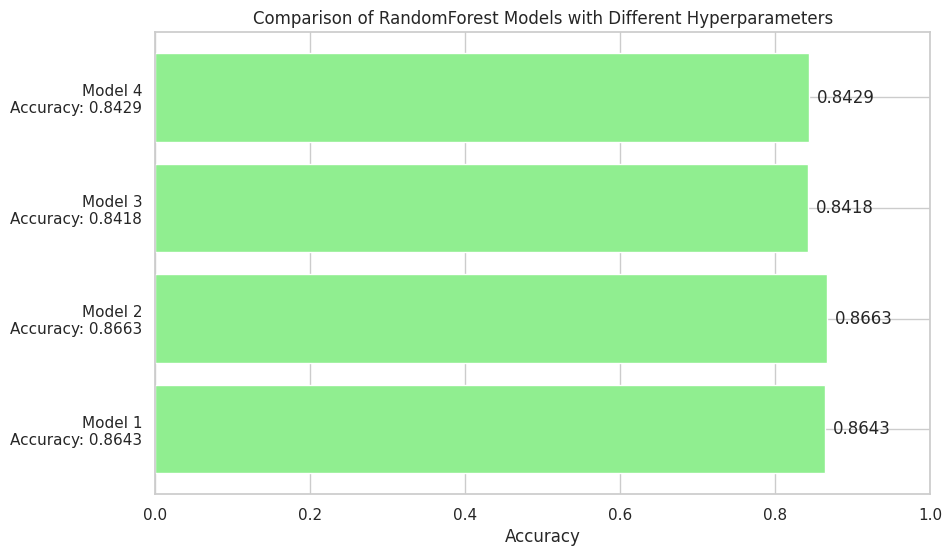

In [ ]:
#RandomForrest
param_variations_rf = [
    {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2},
    {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2},
    {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2},
]

results_rf = []

for params_rf in param_variations_rf:
    rf_classifier = RandomForestClassifier(random_state=42, **params_rf)
    rf_classifier.fit(X_train_pca, y_train)
    rf_predictions = rf_classifier.predict(X_test_pca)

    accuracy_rf = accuracy_score(y_test, rf_predictions)
    results_rf.append(accuracy_rf)

# Plot so sánh RandomForest
labels_rf = [f"Model {i+1}\nAccuracy: {results_rf[i]:.4f}" for i in range(len(param_variations_rf))]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels_rf, results_rf, color='lightgreen')


for bar, result_rf in zip(bars, results_rf):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{result_rf:.4f}', ha='left', va='center')

plt.xlabel('Accuracy')
plt.title('Comparison of RandomForest Models with Different Hyperparameters')
plt.xlim(0, 1)
plt.show()

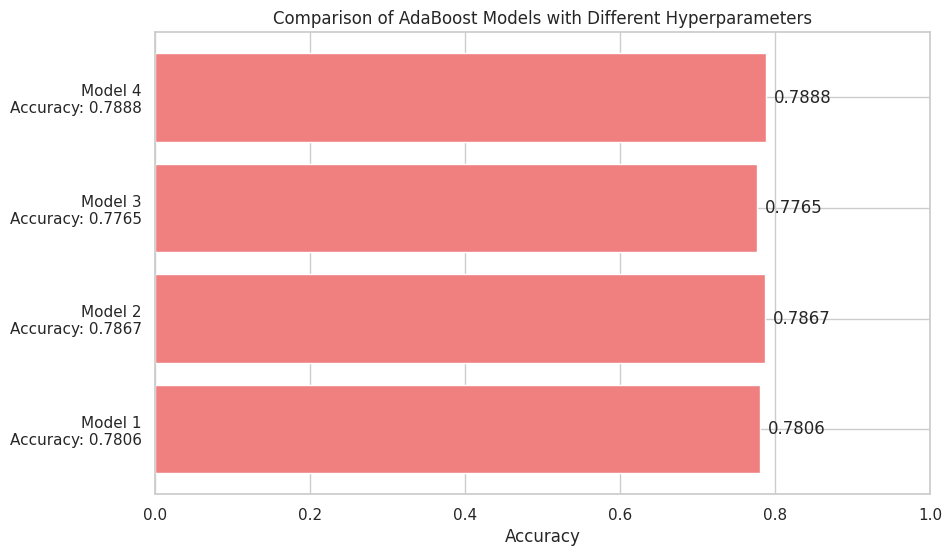

In [ ]:
# Tinh chỉnh các tham số hyperparameters của AdaBoost
param_variations_adb = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 100, 'learning_rate': 1.0},
    {'n_estimators': 50, 'learning_rate': 0.5},
]


results_adb = []

for params_adb in param_variations_adb:
    adb_classifier = AdaBoostClassifier(random_state=42, **params_adb)
    adb_classifier.fit(X_train_pca, y_train)
    adb_predictions = adb_classifier.predict(X_test_pca)

    accuracy_adb = accuracy_score(y_test, adb_predictions)
    results_adb.append(accuracy_adb)

# Plot so sánh AdaBoost
labels_adb = [f"Model {i+1}\nAccuracy: {results_adb[i]:.4f}" for i in range(len(param_variations_adb))]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels_adb, results_adb, color='lightcoral')

for bar, result_adb in zip(bars, results_adb):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{result_adb:.4f}', ha='left', va='center')

plt.xlabel('Accuracy')
plt.title('Comparison of AdaBoost Models with Different Hyperparameters')
plt.xlim(0, 1)
plt.show()

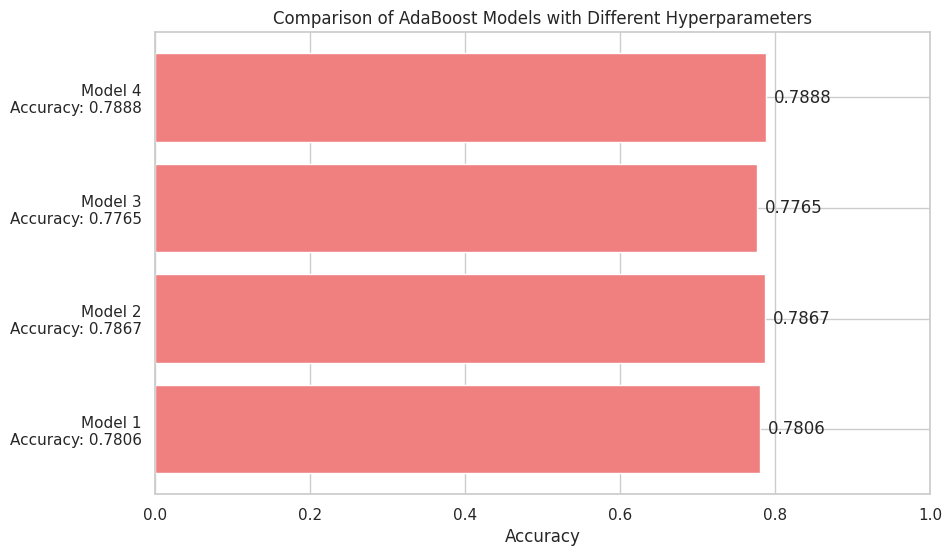

In [ ]:
# Tinh chỉnh các tham số hyperparameters của GradientBoosting
param_variations = [
    {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 2},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'max_features': 0.8},
]

results = []

for params in param_variations:
    gb_classifier = GradientBoostingClassifier(random_state=42, **params)
    gb_classifier.fit(X_train, y_train)
    gb_predictions = gb_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, gb_predictions)
    results.append(accuracy)

# Plot so sánh Gradient Boost
labels_adb = [f"Model {i+1}\nAccuracy: {results_adb[i]:.4f}" for i in range(len(param_variations_adb))]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels_adb, results_adb, color='lightcoral')

for bar, result_adb in zip(bars, results_adb):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{result_adb:.4f}', ha='left', va='center')

plt.xlabel('Accuracy')
plt.title('Comparison of AdaBoost Models with Different Hyperparameters')
plt.xlim(0, 1)
plt.show()

(3918, 4)
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 64)                320       
                                                                 
 dropout_46 (Dropout)        (None, 64)                0         
                                                                 
 dense_72 (Dense)            (None, 32)                2080      
                                                                 
 dropout_47 (Dropout)        (None, 32)                0         
                                                                 
 dense_73 (Dense)            (None, 1)                 33        
                                                                 
 batch_normalization_30 (Ba  (None, 1)                 4         
 tchNormalization)                                               
                                           

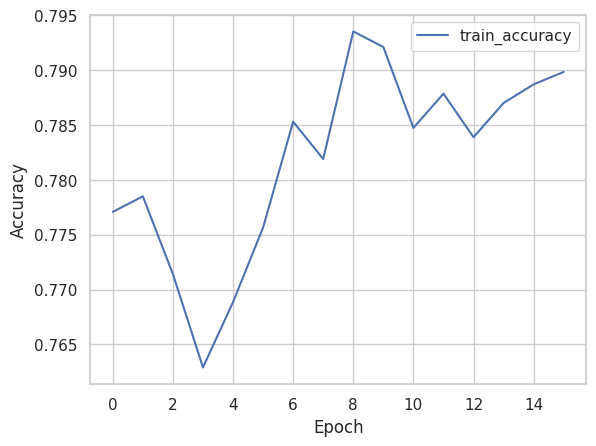

In [ ]:
# FFNN
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
print(X_train_pca.shape)

# Xây dựng mô hình
model = keras.Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dropout(0.2))
# Thêm một layer Dropout sau mỗi model Dense, để ngẫu nhiên loại bỏ một số neuron, khiến cho model bớt phụ thuộc vào một số neuron nhất định
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
# Thêm một layer Dropout sau mỗi model Dense, để ngẫu nhiên loại bỏ một số neuron, khiến cho model bớt phụ thuộc vào một số neuron nhất định
model.add(Dense(1, activation='sigmoid'))
model.add(BatchNormalization())
# Thêm một layer BatchNormalization để chuẩn hóa batch
# Biên soạn mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Hiển thị tóm tắt mô hình
model.summary()
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
# Thêm function early stopping để tránh model tiếp tục học dù mất accuracy sau mỗi epoch
# Huấn luyện mô hình trên tập huấn luyện
history = model.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=2)

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(X_test_pca, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/20
111/111 - 4s - loss: 0.4875 - accuracy: 0.7802 - val_loss: 0.3971 - val_accuracy: 0.8469 - 4s/epoch - 35ms/step
Epoch 2/20
111/111 - 1s - loss: 0.4526 - accuracy: 0.7947 - val_loss: 0.3974 - val_accuracy: 0.8520 - 526ms/epoch - 5ms/step
Epoch 3/20
111/111 - 1s - loss: 0.4492 - accuracy: 0.8035 - val_loss: 0.3995 - val_accuracy: 0.8240 - 543ms/epoch - 5ms/step
Epoch 4/20
111/111 - 1s - loss: 0.4510 - accuracy: 0.7964 - val_loss: 0.3956 - val_accuracy: 0.8469 - 525ms/epoch - 5ms/step
Epoch 5/20
111/111 - 1s - loss: 0.4496 - accuracy: 0.8018 - val_loss: 0.3974 - val_accuracy: 0.8393 - 573ms/epoch - 5ms/step
Epoch 6/20
111/111 - 1s - loss: 0.4467 - accuracy: 0.8003 - val_loss: 0.3953 - val_accuracy: 0.8444 - 523ms/epoch - 5ms/step
Epoch 7/20
111/111 - 1s - loss: 0.4472 - accuracy: 0.7961 - val_loss: 0.4006 - val_accuracy: 0.8240 - 522ms/epoch - 5ms/step
Epoch 8/20
111/111 - 0s - loss: 0.4475 - accuracy: 0.7935 - val_loss: 0.4016 - val_accuracy: 0.8189 - 499ms/epoch - 4ms/step
Ep

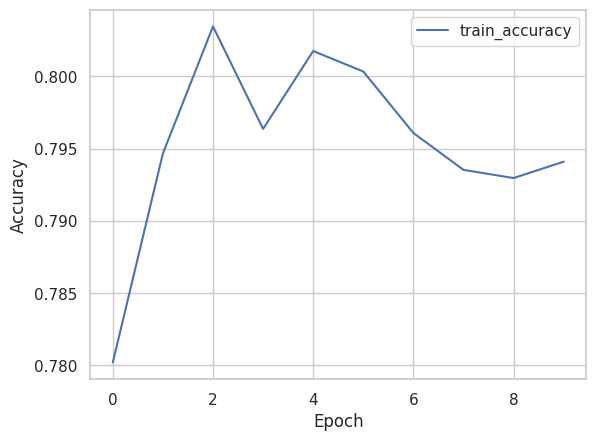

In [ ]:
from keras.layers import Reshape
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
# Khởi tạo mô hình RNN
classifier = Sequential()

# Thêm lớp Reshape để biến đổi kích thước đầu vào
classifier.add(Reshape((X_train_pca.shape[1], 1), input_shape=(X_train_pca.shape[1],)))

# Thêm lớp SimpleRNN với đầu vào là số lượng units là 50 và return_sequences=True vì chúng ta có nhiều tầng ẩn
classifier.add(SimpleRNN(units=25, return_sequences=True))
classifier.add(Dropout(0.2))
# Thêm lớp SimpleRNN khác với return_sequences=False vì chúng ta chỉ cần output ở tầng cuối cùng
classifier.add(SimpleRNN(units=25, return_sequences=False))
classifier.add(Dropout(0.2))
# Thêm lớp output Dense với 1 unit và activation='sigmoid' vì đây là bài toán phân loại nhị phân
classifier.add(Dense(units=1, activation='sigmoid'))

# Biên dịch mô hình với optimizer là 'adam' và hàm loss là 'binary_crossentropy'
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)

# Huấn luyện mô hình trên tập huấn luyện
history = classifier.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=2)

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = classifier.evaluate(X_test_pca, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Cải thiện độ chính xác sau khi huấn luyện

Sau khi huấn luyện một mô hình, có nhiều kỹ thuật bạn có thể sử dụng để có thể cải thiện độ chính xác của mô hình. Dưới đây là một số chiến lược phổ biến:

# Tinh Chỉnh Tham Số (Hyperparameter Tuning): Đã thực hiện ở phần chống overfitting
Thử nghiệm với các giá trị tham số khác nhau để tìm sự kết hợp tốt nhất cho bộ dữ liệu cụ thể của bạn. Điều này có thể bao gồm việc điều chỉ các tốc độ học, chiều sâu cây, các tham số chống quá mức (regularization), v.v., phụ thuộc vào loại mô hình bạn đang sử dụng.
# Kỹ Thuật Trích Đặc Tính (Feature Engineering): Đã thực hiện ở đầu bài để xử lý dữ liệu
Khám phá các cách khác nhau để biểu diễn các đặc trưng. Bạn có thể tạo ra các đặc trưng mới, biến đổi các đặc trưng hiện có, hoặc sử dụng các kỹ thuật giảm chiều dữ liệu để cải thiện chất lượng dữ liệu đầu vào.
# Phương Pháp Tập Hợp (Ensemble Methods):
Kết hợp nhiều mô hình để tạo ra một tập hợp. Các kỹ thuật như bagging và boosting có thể được áp dụng để cải thiện hiệu suất tổng thể. Ví dụ, bạn có thể thử kết hợp các mô hình khác nhau như RandomForest, Gradient Boosting, hoặc XGBoost.

 # Kiểm Tra Chéo (Cross-Validation):
Sử dụng kiểm tra chéo để có ước lượng tốt hơn về hiệu suất của mô hình. Điều này giúp đảm bảo rằng mô hình của bạn có khả năng tổng quát hóa tốt với dữ liệu mới, chưa được nhìn thấy.

#Tăng Cường Dữ Liệu (Data Augmentation):
Đối với một số loại mô hình, đặc biệt là trong dữ liệu hình ảnh hoặc văn bản, bạn có thể tăng kích thước của tập huấn luyện của mình thông qua kỹ thuật tăng cường dữ liệu. Điều này bao gồm việc áp dụng biến đổi ngẫu nhiên cho dữ liệu hiện có (ví dụ: xoay, lật, cắt ảnh).

#Chống Quá Mức (Regularization): Đã thực hiện ở đối với dữ liệu và qua từng bước huấn luyện mô hình
Áp dụng các kỹ thuật chống quá mức để ngăn chặn việc quá mức hóa. Điều này có thể bao gồm việc thêm các hệ số phạt cho hàm mất mát cho các trọng số lớn, hoặc sử dụng dropout trong mạng nơ-ron.

#Phân Tích Lỗi (Error Analysis):
Phân tích các lỗi mà mô hình của bạn gặp trên tập kiểm tra hoặc tập xác nhận. Hiểu rõ loại lỗi mà mô hình đang gặp có thể cung cấp thông tin về các điểm cần cải thiện.

#Tốc Độ Học Linh Hoạt (Learning Rate Schedules): Đã thực hiện ở phần chống overfitting
Điều chỉnh tốc độ học trong quá trình huấn luyện. Lịch trình tốc độ học hoặc tốc độ học thích ứng có thể giúp mô hình hội tụ nhanh hơn và tránh quá mức.

#Chuẩn Hóa và Chia Sẻ Tính Năng (Feature Scaling and Normalization): Đã thực hiện ở bước tiền xử lý dữ liệu
Đảm bảo rằng các đặc trưng của bạn được tỷ lệ hoặc chuẩn hóa một cách thích hợp. Một số thuật toán, đặc biệt là những thuật toán dựa trên khoảng cách, có thể hưởng lợ

31/31 [==============================] - 0s 5ms/step


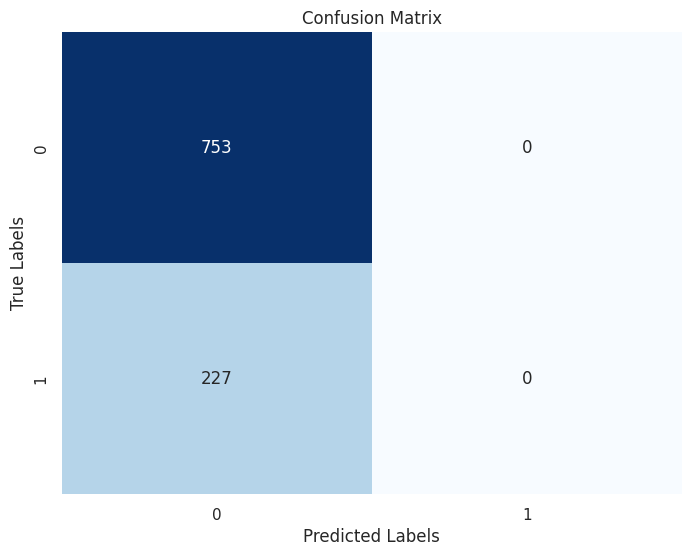

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       753
           1       0.00      0.00      0.00       227

    accuracy                           0.77       980
   macro avg       0.38      0.50      0.43       980
weighted avg       0.59      0.77      0.67       980


Misclassified Examples:
Example 1:
True Label: 1, Predicted Label: 0
Example 2:
True Label: 1, Predicted Label: 0
Example 3:
True Label: 1, Predicted Label: 0
Example 4:
True Label: 1, Predicted Label: 0
Example 5:
True Label: 1, Predicted Label: 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def error_analysis_ensemble_learning(model, X, y_true):
    # Model dự đoán từ từ tập X
    y_pred = model.predict(X)

    # Khởi tạo Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Trả về Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # In ra một số các lỗi
    misclassified_indices = y_true != y_pred
    misclassified_X = X[misclassified_indices]
    misclassified_true_labels = y_true[misclassified_indices]
    misclassified_pred_labels = y_pred[misclassified_indices]

    print("\nMisclassified Examples:")
    for i in range(min(5, len(misclassified_X))):
        print(f"Example {i + 1}:")
        print(f"True Label: {misclassified_true_labels[i]}, Predicted Label: {misclassified_pred_labels[i]}")
        # Phân tích sâu hơn


def error_analysis_neural_network(model, X, y_true, class_labels=None):
    # Make predictions
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    if class_labels:
        plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
        plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Display some misclassified examples
    misclassified_indices = y_true != y_pred
    misclassified_X = X[misclassified_indices]
    misclassified_true_labels = y_true[misclassified_indices]
    misclassified_pred_labels = y_pred[misclassified_indices]

    print("\nMisclassified Examples:")
    for i in range(min(5, len(misclassified_X))):
        print(f"Example {i + 1}:")
        print(f"True Label: {misclassified_true_labels[i]}, Predicted Label: {misclassified_pred_labels[i]}")
        # Phân tích sâu hơn
# Phần thay tham số
error_analysis_neural_network(model, X_test_pca, y_test)